<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 153.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 158.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 152.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 136.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 154.3 MB/s eta 0:00:00


Import pandas and matplotlib


In [3]:
import pandas as pd

import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [5]:
## Write your code here

# Check how many duplicates exist
print(df.duplicated().sum())

# Display just the first few duplicate rows
print(df[df.duplicated(keep=False)].head(10))


20
   ResponseId                                         MainBranch  \
0           1                     I am a developer by profession   
1           2                     I am a developer by profession   
2           3                     I am a developer by profession   
3           4                              I am learning to code   
4           5                     I am a developer by profession   
5           6                        I code primarily as a hobby   
6           7  I am not primarily a developer, but I write co...   
7           8                              I am learning to code   
8           9                        I code primarily as a hobby   
9          10                     I am a developer by profession   

                  Age                                         Employment  \
0  Under 18 years old                                Employed, full-time   
1     35-44 years old                                Employed, full-time   
2     45-54 years ol

### Task 2: Analysis of Duplicate Response Patterns
1. Identify duplicate response patterns based on selected columns such as MainBranch, Employment, and RemoteWork.
2. Clarify that these represent multiple respondents with identical answers rather than duplicate records. Analyse which other columns frequently share identical values within these response-pattern groups.
   


In [6]:
## Write your code here


# Identify duplicate response patterns based on selected columns
pattern_cols = ["MainBranch", "Employment", "RemoteWork"]

duplicates = df[df.duplicated(subset=pattern_cols, keep=False)]


# Analyse which OTHER columns also frequently share identical values
results = []

for col in df.columns:
    if col not in pattern_cols:
        grouped = duplicates.groupby(pattern_cols)[col].nunique()                           # within each pattern group, check how often values are identical
        identical_pct = (grouped == 1).mean() * 100                                         # nunique() -> 1 means everyone in that group gave the same answer
        results.append({"Column": col, "Identical Values (%)": round(identical_pct, 1)})

# Sort by highest agreement and display
results_df = pd.DataFrame(results).sort_values("Identical Values (%)", ascending=False)
print(results_df)



                   Column  Identical Values (%)
2                   Check                 100.0
77                 ICorPM                  30.4
73               AIThreat                  27.6
56              SOAccount                  26.6
71  AINextLess integrated                  23.8
..                    ...                   ...
9            YearsCodePro                   2.5
15            TechEndorse                   2.5
13             BuyNewTool                   2.2
3        CodingActivities                   0.3
0              ResponseId                   0.0

[111 rows x 2 columns]


### Task 3: Visualize Shared Response Patterns
1. Create visualizations to show the distribution of shared response patterns across different categories.
2. Use bar charts or pie charts to represent the distribution of respondents who share identical values for MainBranch, Employment, and RemoteWork, grouped by Country and Employment.


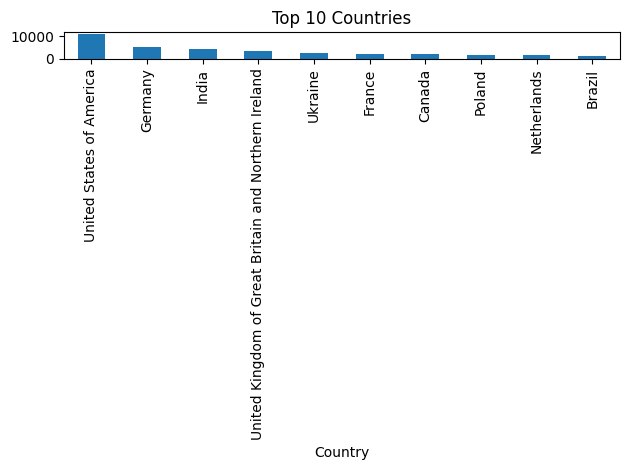

/tmp/ipykernel_300/3310037187.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


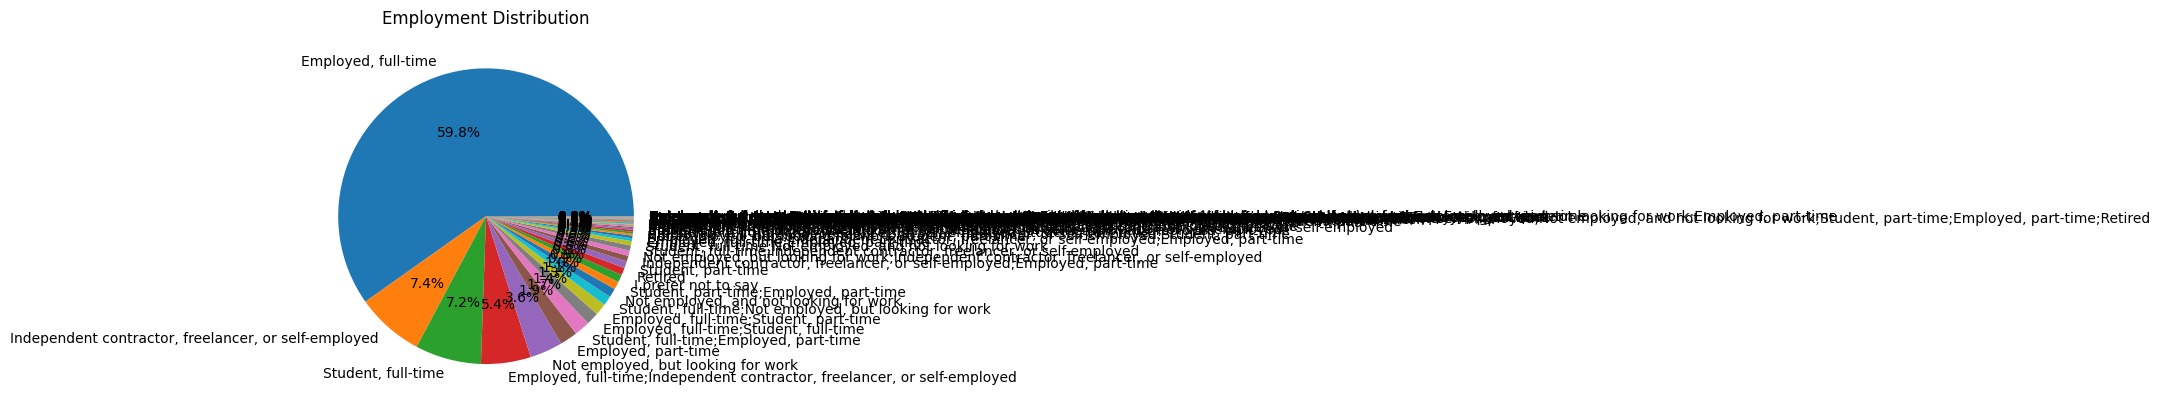

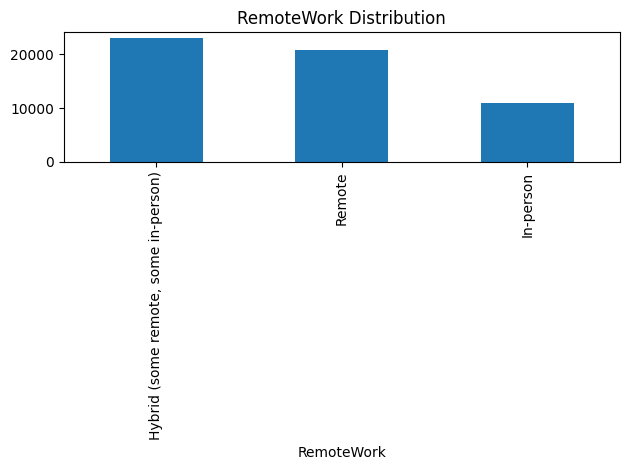

In [12]:
## Write your code here

pattern_cols = ["MainBranch", "Employment", "RemoteWork"]
duplicates = df[df.duplicated(subset=pattern_cols, keep=False)]

# Top 10 Countries
duplicates["Country"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Countries")
plt.tight_layout()
plt.show()

# Employment pie chart
duplicates["Employment"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Employment Distribution")
plt.tight_layout()
plt.show()

# RemoteWork bar chart
duplicates["RemoteWork"].value_counts().plot(kind="bar")
plt.title("RemoteWork Distribution")
plt.tight_layout()
plt.show()




### Task 4: Evaluate Duplicate Handling Strategy
1. Analyse the dataset to determine which column(s) define record uniqueness.
2. Assess whether removing rows based on a subset of columns (rather than complete row duplication) is appropriate.
Justify your decision with reference to the structure and purpose of the dataset.


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
